In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart(1).csv to heart(1).csv


In [5]:
df = pd.read_csv('heart(1).csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


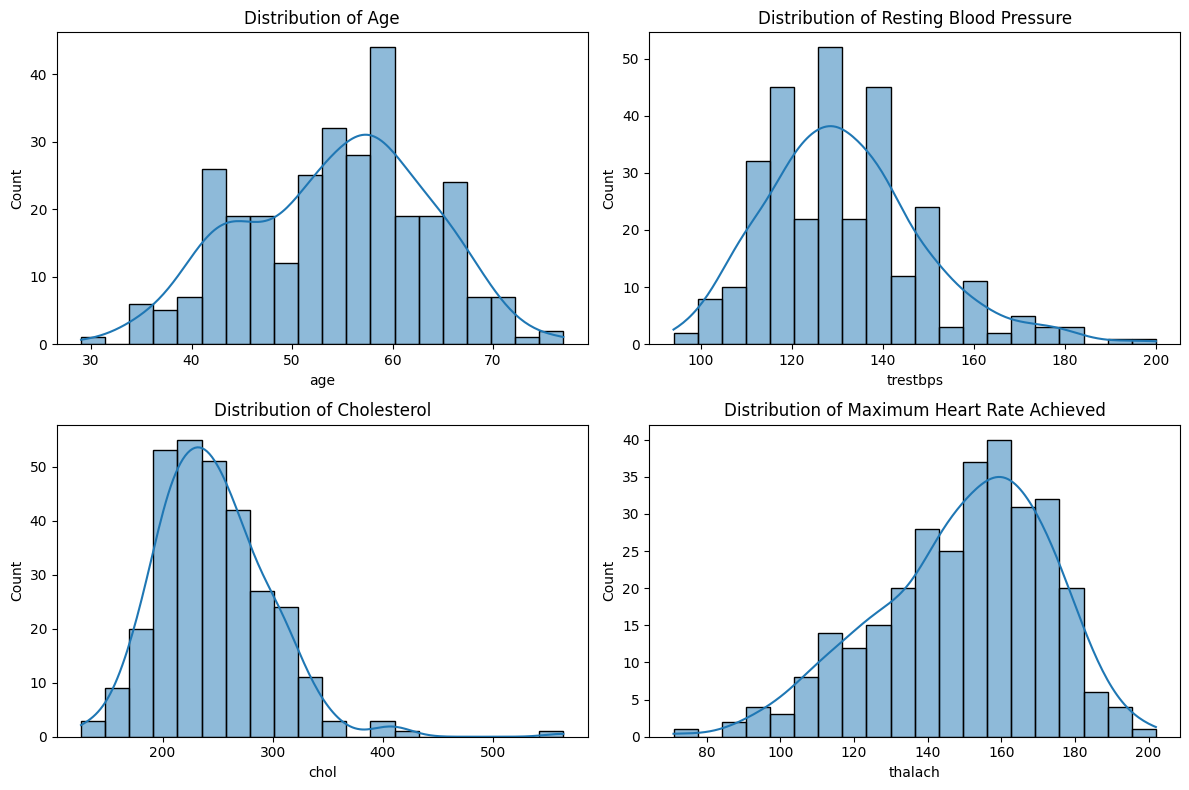

In [7]:
# Plot histograms for age, trtbps (resting blood pressure), chol (cholesterol), and thalachh (maximum heart rate achieved)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure')

plt.subplot(2, 2, 3)
sns.histplot(df['chol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol')

plt.subplot(2, 2, 4)
sns.histplot(df['thalach'], bins=20, kde=True)
plt.title('Distribution of Maximum Heart Rate Achieved')

plt.tight_layout()
plt.show()


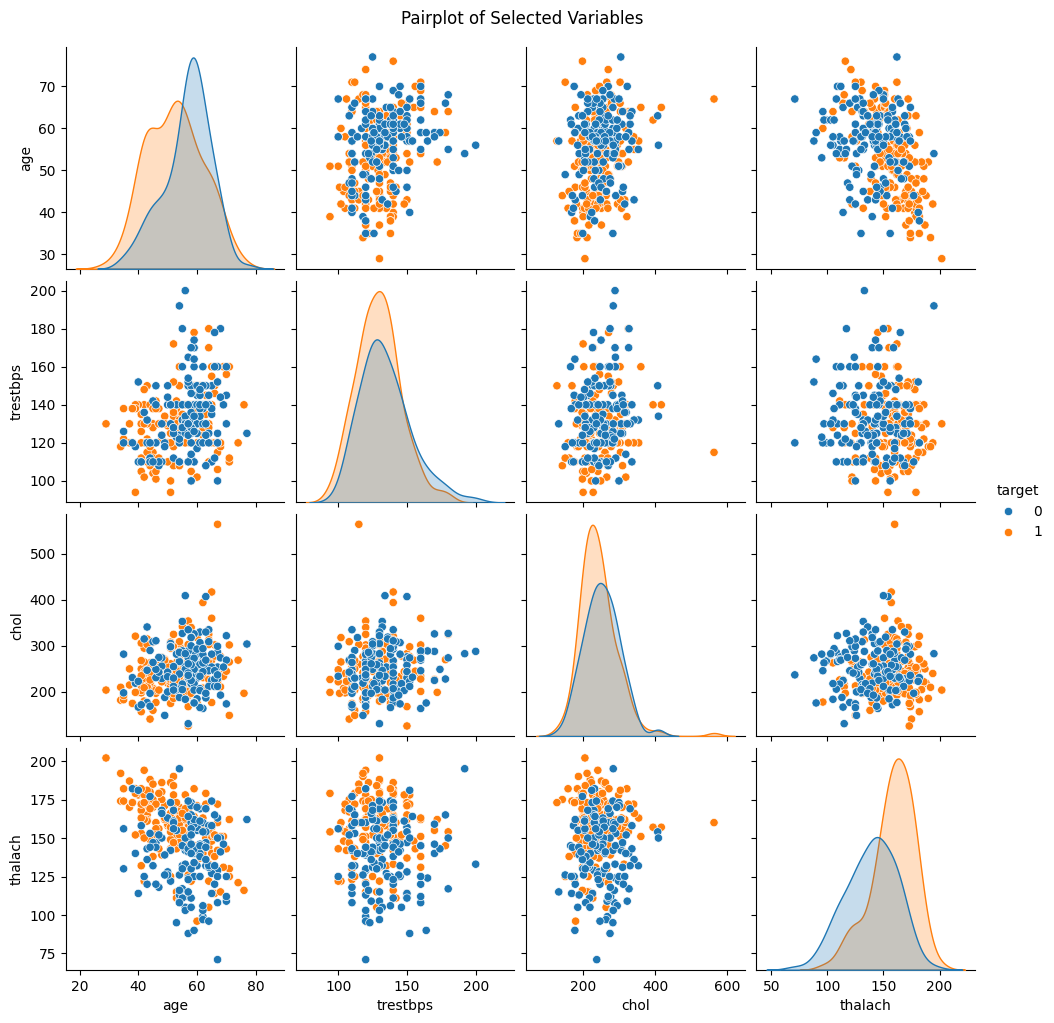

In [8]:
# Create a pairplot for selected variables
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


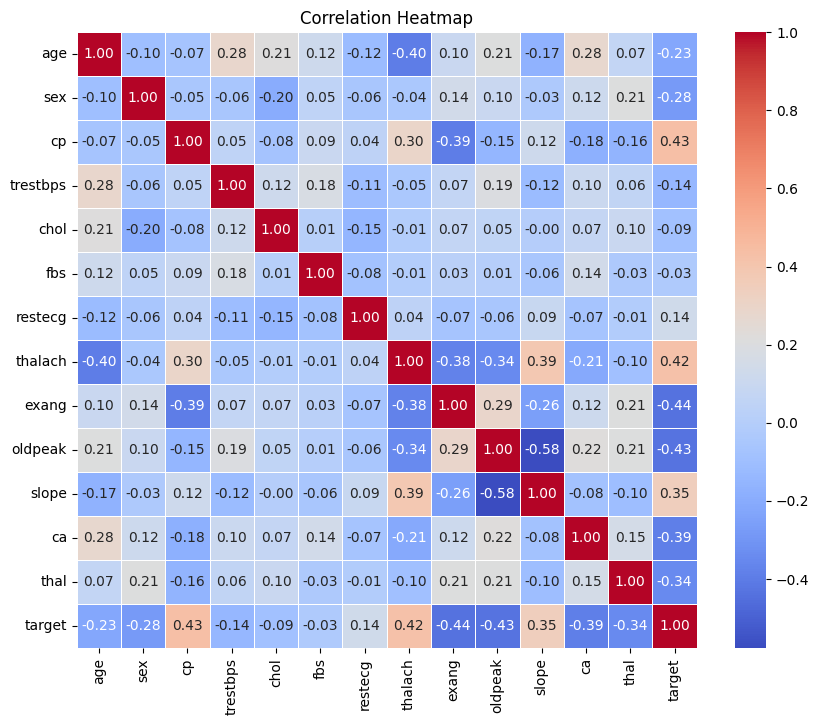

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Group data by age and calculate the mean cholesterol levels
age_chol_avg = df.groupby('age')['chol'].mean().reset_index()


<ipython-input-11-ddc6590a7091>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='chol', data=age_chol_avg, palette='viridis')


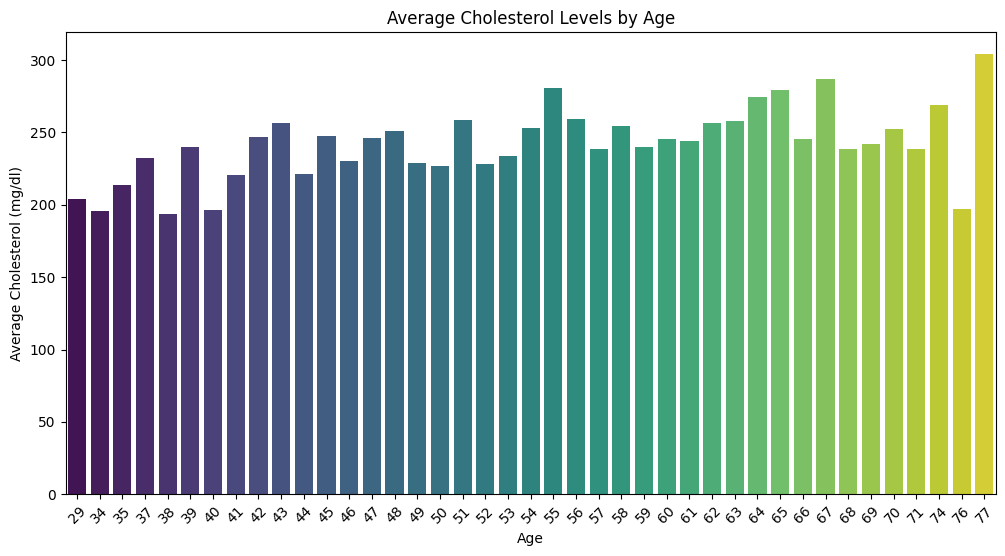

In [11]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='chol', data=age_chol_avg, palette='viridis')
plt.title('Average Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Average Cholesterol (mg/dl)')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Group data by 'sex' and 'thall', and count the occurrences
sex_thall_counts = df.groupby(['sex', 'thal']).size().reset_index(name='count')


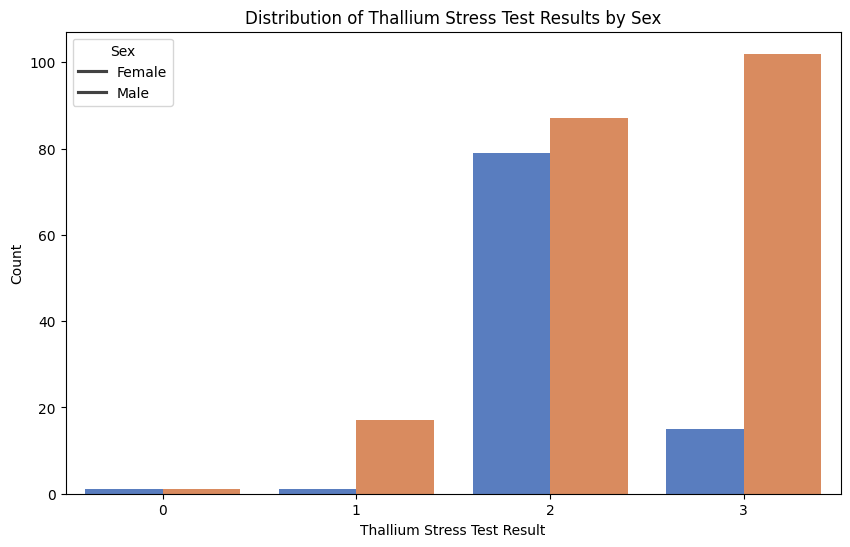

In [15]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='thal', y='count', hue='sex', data=sex_thall_counts, palette='muted')
plt.title('Distribution of Thallium Stress Test Results by Sex')
plt.xlabel('Thallium Stress Test Result')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()


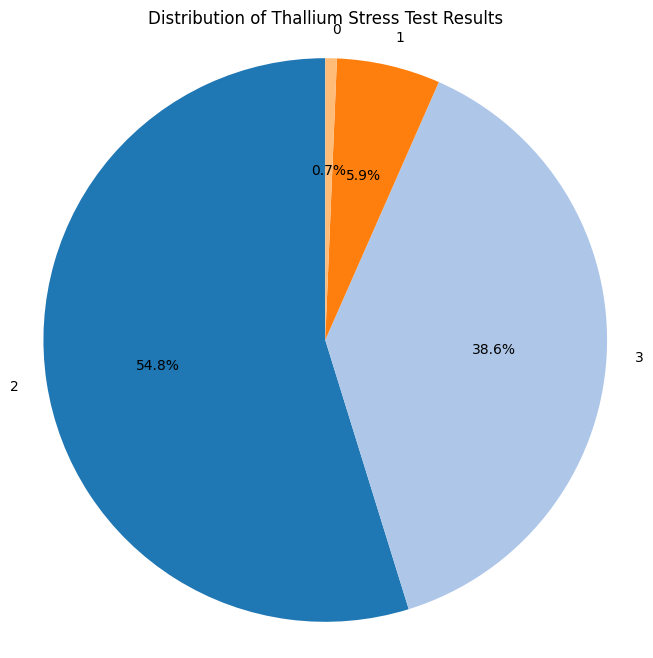

In [16]:
# Calculate value counts of 'thal'
thall_counts = df['thal'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(thall_counts, labels=thall_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribution of Thallium Stress Test Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

